<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Abschnitt_3_Neural_Network_regression_with_TensorFlow/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we´re going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number



In [1]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


#Create data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

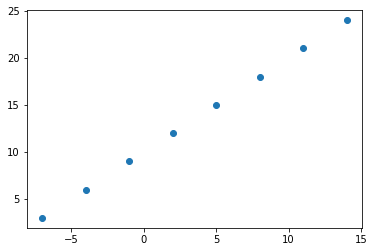

In [3]:
#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X, Y)

#Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = Y[0].shape

In [6]:
print(input_shape)
print(output_shape)

()
()


In [7]:
X[0], Y[0]

(-7.0, 3.0)

#Turn NumPy arrays into tensors and Change Datatype



In [8]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)

In [9]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = Y[0].shape

In [11]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#Steps in modelling with TensorFlow
1. Creating a model  define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model  define the loss function (in other words, the function how wrong it s) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance to our model).
3. Fitting a model - letting the model try to find pattern between X & Y (features an labels)

In [12]:
#Set random seed
tf.random.set_seed(42)

In [13]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 607ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
#Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
#Try and make a predictions using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

###Improving our model

We can improve our mode, by altering the steps we took to create a model

1. Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compile the model - here we might change the optimization function or perhaps the leraning rate of the optimization function.
3. Fitting the model - here we might fit a model for more epochs (leave training for longer) or on more data (give the model more examples to learn from)

In [17]:
#Let´s rebuild our model

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=100, verbose=0)

In [18]:
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [19]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. Fit the model
model.fit(X, Y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
y_pred = model.predict([17.0])
y_pred

array([[26.58353]], dtype=float32)

###Evaluation a model

In practice, a typical workflow you´ll go through when building a neural network is:

Build a model -> fit it -> evaluate it -> tweak it -> Build a model -> fit it -> evaluate it -> tweak it -> Build a model -> fit it -> evaluate it -> tweak it -> ...

When it comes to evaluation... there are 3 words you should memorize:

"Visualize, Visualize, Visualize"

It´s a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what dous our model look like?
* The training of a model - how does a model perform while it learn?
* The predictions of the modle - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

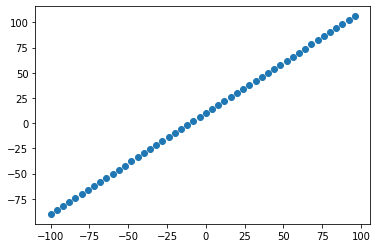

In [24]:
#Visualize the data
plt.scatter(X, y)

###The 3 sets...
* Training set - the model learns from this data, which is typicalle 70-80% of the total data you have available
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what it has learned, thos is typically 10-15% of the total data available

In [25]:
len(X)

50

In [26]:
#Split the data into train and test sets

x_train = X[:40]
y_train = y[:40]
x_test = X[40:]
y_test = y[40:]

In [27]:
len(x_train), len(x_test)

(40, 10)

In [28]:
len(y_train), len(y_test)

(40, 10)

###Visualizing the data

We´ve got our data in training an test sets.. let´s visualize it again!

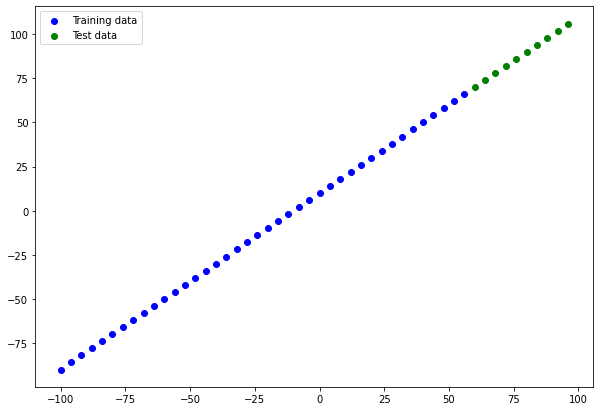

In [29]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") #our model will learn on this
#Plot training data in green
plt.scatter(x_test, y_test, c="g", label="Test data") #our model will predict on this
#show a legend
plt.legend()

In [30]:
#1. Create a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss="mae", optimizer="SGD", metrics=["mae"])

#3. Fit the model
model.fit(x_train, y_train, epochs=100, verbose=0)

###Visualizing the model

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Let´s create a model which build automaticall by defining the input_shape argument
tf.random.set_seed(42)

#1. Create a model 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
        tf.keras.layers.Dense(1, name="output_layer")
], name="model_with_name")

#2. Compile the model

model.compile(loss="mae", optimizer="SGD", metrics=["mae"])

#3. Fit the model
model.fit(x_train, y_train, epochs=100, verbose=0)

In [33]:
#get summary of model
model.summary()

Model: "model_with_name"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren´t updated during training (this is typical when you bring in already learned patterns or parameters from other models during transfer learning)

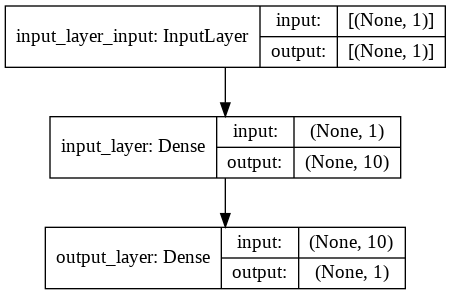

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

###Visualize models predictions

To visualize predictions, it´s a good idea to plot them against the ground truth labels.

Often you´ll see this in the form of y_test or y_true versus y_pred (ground truth versus the models predictions)

In [35]:
#Make some predictions
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

If you feel like you´re going to reuse some kind of functionality in the future, it´s a good idea to put in in a function

In [37]:
#Let´s create a plotting function
def plot_predictions(train_data=x_train, train_labels=y_train, 
                     test_data=x_test, test_labels=y_test, 
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

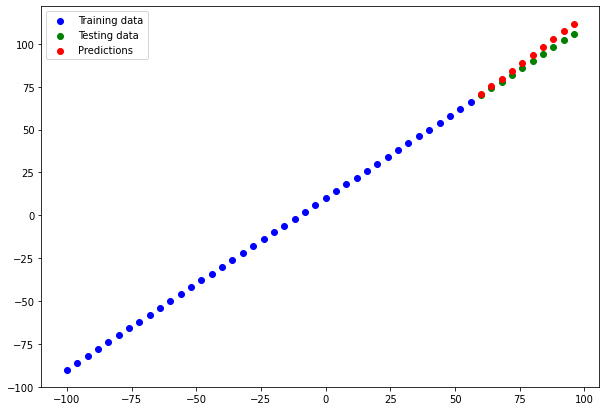

In [38]:
plot_predictions()

###Evaluating our model´s predictions with regression evaluation metrics

Depending on the problem you´re working in, there will be different evaluation metrics to evaluate your model´s performance.

Sincé we´re working on a regression, two of the main metrics:
* MAE - mean absolute error
* MSE - mean square error

In [39]:
#Evaluate the model on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 121ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [40]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [41]:
tf.squeeze(y_pred)
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [42]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [43]:
#Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.constant(y_pred))
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([436.42645, 297.38196, 200.4321 , 145.57661, 132.81555, 162.14896,
       233.57675, 347.09894, 502.7155 , 700.4266 ], dtype=float32)>

In [44]:
#Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, y_pred)

###Running experiments to improve our model

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more chance to find patterns in the data

Let´s do 3 modelling experiments:

1. model_1 - same as the originale model, 1 layer, trained for 100 epochs
2. model_2 - 2 layers. trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs

***Build model_1***

In [45]:
#Set random seed
tf.random.set_seed(42)

#Create model
model_1 = tf.keras.Sequential([
                     tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

#fit the model
model_1.fit(x_train, y_train, verbose=0, epochs=100)

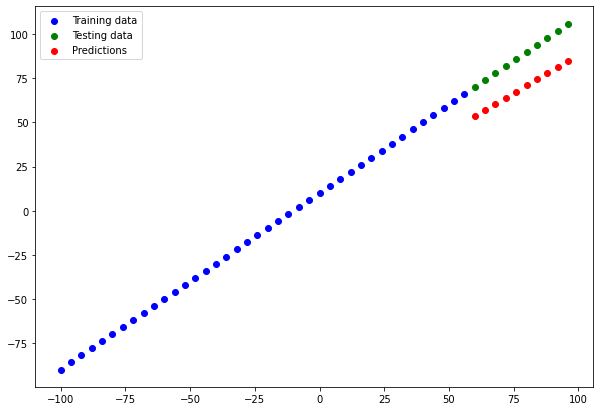

In [46]:
#Make predictions and plot for model 1
y_pred_1 = model_1.predict(x_test)
plot_predictions(x_train, y_train, x_test, y_test, y_pred_1)

In [47]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

***Build model_2***

In [48]:
#Set random seed
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

#fit the model
model_2.fit(x_train, y_train, verbose=0, epochs=100)

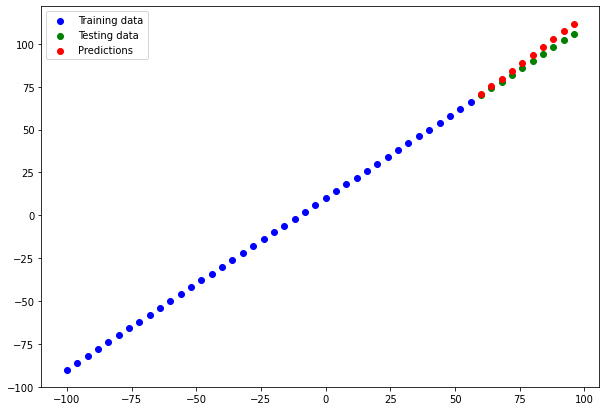

In [49]:
#Make predictions and plot for model 2
y_pred_2 = model_2.predict(x_test)
plot_predictions(x_train, y_train, x_test, y_test, y_pred_2)

In [50]:
#Calculate model_1 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

***Build model_3***

In [51]:
#Set random seed
tf.random.set_seed(42)

#Create model
model_3 = tf.keras.Sequential([
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

#fit the model
model_3.fit(x_train, y_train, verbose=0, epochs=500)

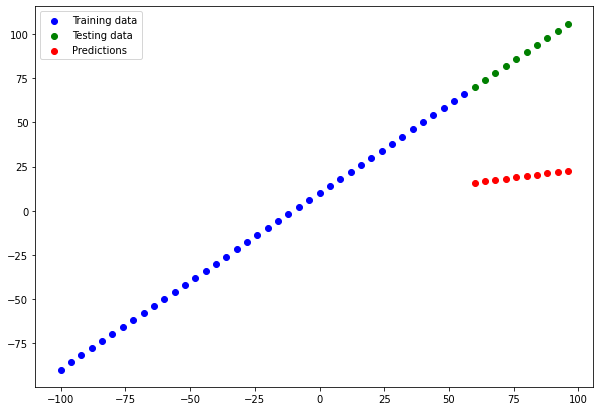

In [52]:
#Make predictions and plot for model 2
y_pred_3 = model_3.predict(x_test)
plot_predictions(x_train, y_train, x_test, y_test, y_pred_3)

In [53]:
#Calculate model_1 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

###Comparing the results of our experiments

In [54]:
#Let´s compare our model´s results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=(["model", "mae", "mse"]))
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like model_2 performed th best...

In [55]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you´re running lots of experiments.

Luckily, there are tools to help us!

* TensorBoard - a component of the TensorFlow libraray to help track modelling experiments (we´ll see this one later)

* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into tensorboard)

###Saving our models

Saving our models allows us to use them outside of Google Colab.

There are two main formats we can save our model´s too:
1. The SavedModel format
2. The HDF5 format

In [56]:
#Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [57]:
#Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model


In [58]:
#Load in the model from SavedModel format
loaded_saved_model_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_saved_model_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [59]:
#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_pred = loaded_saved_model_format.predict(x_test)

In [60]:
model_2_preds == loaded_SavedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
#Load in the model from hdf5 format
loaded_hdf5_model_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_hdf5_model_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [62]:
#Compare model_2 predictions with hdf5 format model predictions
model_2_preds = model_2.predict(x_test)
loaded_hdf5_format_pred = loaded_saved_model_format.predict(x_test)

In [63]:
model_2_preds == loaded_hdf5_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to "files" tab right click on the file you´re after and click "download"
2. Use Code
3. Save it to Google Drive by connecting it and copying it there

In [64]:
#Dowanload a file from Google Colab
from google.colab import files
#files.download("/content/best_model_HDF5_format.h5")

In [65]:
#Save a file from Google Colab to Google Drive
#!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

### A larger Example

In [66]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
#Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [68]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
insurance["sex"], insurance["bmi"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64)

In [70]:
#One hot encode the dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [71]:
#Create x (features) and y (labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [72]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [73]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [74]:
#Create training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [75]:
#Build a neural network
tf.random.set_seed(42)

#Create a model 
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

#Compile the model 
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#Fit the model
insurance_model.fit(x_train, y_train, epochs=100, verbose=0)

In [76]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [77]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

### Improve the insurance model

To improve our model, we´ll run 2 experiments:
1. Add an extra layers with more hidden units and use the Adam optimizer
2. Same as above and train for longer
3. (insert your own experiment here)

In [78]:
#Set random seed
tf.random.set_seed(42)

#Create the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

#Compile the model 
insurance_model_2.compile(loss="mae", optimizer="Adam", metrics=["mae"])

#Fit the model
insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [79]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [80]:
#Set random seed
tf.random.set_seed(42)

#Create the model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

#Compile the model 
insurance_model_3.compile(loss="mae", optimizer="Adam", metrics=["mae"])

#Fit the model
history = insurance_model_3.fit(x_train, y_train, epochs=200, verbose=0)

In [81]:
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7854


[3488.785400390625, 3488.785400390625]

Text(0.5, 0, 'epochs')

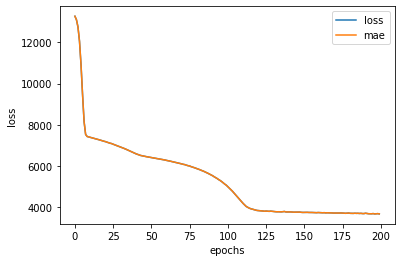

In [82]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you´re not sure on which to use, you could try both and see which perfoms better.

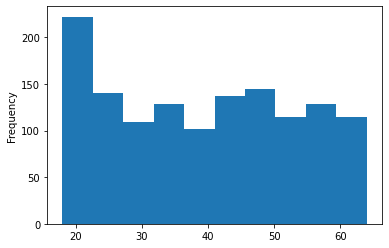

In [84]:
x["age"].plot(kind="hist")

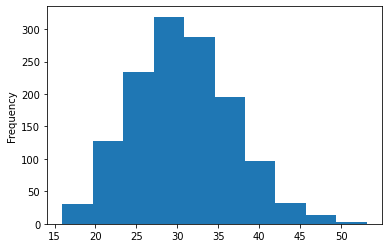

In [85]:
x["bmi"].plot(kind="hist")

In [86]:
x["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

To prepare our data, we can borrow a few classes from Scikit-Learn

In [89]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [92]:
#Create a column transformer
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

#Crate x & y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Fit the column transformer to out training data
ct.fit(x_train)

#transofmr training and test data with normalization and onhotencoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [95]:
#What does our data look like now
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [96]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Our data has been normalized and one hot encoded. Now let´s build a neural network model on it

In [97]:
tf.random.set_seed(42)
#Build the model
model_4 = tf.keras.Sequential([
                                    tf.keras.layers.Dense(100),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Dense(1)

])

#Compile the model
model_4.compile(loss="mae", optimizer="Adam", metrics=["mae"])

#Fit the model
history = model_4.fit(x_train_normal, y_train, epochs=100, verbose=0)

In [99]:
#Evaluate the model
model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

Text(0.5, 0, 'epochs')

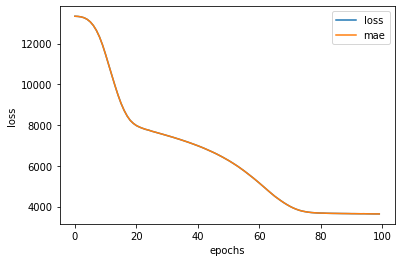

In [100]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")